In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect
from sqlalchemy.engine import reflection

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
Inspector = inspect(engine)
insp = reflection.Inspector.from_engine(engine)
print(insp.get_table_names())

['measurement', 'station']


In [12]:
print(insp.get_columns("measurement"))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [13]:
print(insp.get_columns("station"))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [14]:
engine.execute("select * from station limit 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
engine.execute("select * from measurement limit 10").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date =  session.query(Measurement).order_by(Measurement.date.desc()).first()
last_date.date

'2017-08-23'

In [17]:
# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
last_year

datetime.date(2016, 8, 23)

In [18]:
# Perform a query to retrieve the data and precipitation scores
prcp_date = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>last_year).\
            order_by(Measurement.date).all()
prcp_date

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

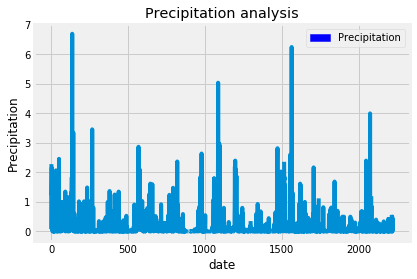

In [19]:

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_date_df = pd.DataFrame(prcp_date)
prcp_date_df.head()
# Sort the dataframe by date
prcp_date_df.set_index('date')
# Use Pandas Plotting with Matplotlib to plot the data
#ax1 = prcp_date_df.plot(kind="bar", x="date", y="prcp",color = "blue", grid=True,
       #          title="Climate Analysis",alpha =0.75,figsize = (20,8))
prcp_date_df.plot()  
plt.xlabel("date")
plt.ylabel("Precipitation")
plt.title("Precipitation analysis")
legend_df = mpatches.Patch(color='blue', label='Precipitation')
plt.legend(handles=[legend_df],loc='upper right')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_date_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# Design a query to show how many stations are available in this dataset?
no_of_stations = session.query(Station).count()
print(f'There are {no_of_stations} active stations')

There are 9 active stations


In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                  order_by(func.count(Measurement.tobs).desc()).all()
for station,count in active_stations:
    print(f'Station {station} has {count} temperatures.')


Station USC00519281 has 2772 temperatures.
Station USC00519397 has 2724 temperatures.
Station USC00513117 has 2709 temperatures.
Station USC00519523 has 2669 temperatures.
Station USC00516128 has 2612 temperatures.
Station USC00514830 has 2202 temperatures.
Station USC00511918 has 1979 temperatures.
Station USC00517948 has 1372 temperatures.
Station USC00518838 has 511 temperatures.


In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
highest_active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                         order_by(func.count(Measurement.tobs).desc()).first()
print(f'Highest active station {highest_active_station.station}')
lowest_temperature = session.query(Measurement.station, func.min(Measurement.tobs).label('min_temp')).group_by(Measurement.station).\
                        filter(Measurement.station==highest_active_station.station).first()
print(f'Lowest temperature of most active station is {lowest_temperature.min_temp}')
highest_temperature = session.query(Measurement.station, func.max(Measurement.tobs).label('max_temp')).group_by(Measurement.station).\
                        filter(Measurement.station==highest_active_station.station).first()
avg_temperature = session.query(Measurement.station, func.avg(Measurement.tobs).label('avg_temp')).group_by(Measurement.station).\
                        filter(Measurement.station==highest_active_station.station).first()
print(f'Average temperature of most active station is {avg_temperature.avg_temp}')

Highest active station USC00519281
Lowest temperature of most active station is 54.0
Average temperature of most active station is 71.66378066378067


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
active_station_last_date =  session.query(Measurement.date).filter(Measurement.station==highest_active_station.station).\
                            order_by(Measurement.date.desc()).first()
active_station_last_date
active_station_last_year = dt.date(2017, 8, 18) - dt.timedelta(days=365)
active_station_last_year
temp_active_station = session.query(Measurement.station,Measurement.date,Measurement.tobs).filter(Measurement.date>active_station_last_year).\
                      filter(Measurement.station==highest_active_station.station).order_by(Measurement.date).all()
print(f'Last 12 months of temperature observation data for most active station {highest_active_station.station} {temp_active_station}')

Last 12 months of temperature observation data for most active station USC00519281 [('USC00519281', '2016-08-19', 79.0), ('USC00519281', '2016-08-20', 81.0), ('USC00519281', '2016-08-21', 79.0), ('USC00519281', '2016-08-22', 78.0), ('USC00519281', '2016-08-23', 77.0), ('USC00519281', '2016-08-24', 77.0), ('USC00519281', '2016-08-25', 80.0), ('USC00519281', '2016-08-26', 80.0), ('USC00519281', '2016-08-27', 75.0), ('USC00519281', '2016-08-28', 73.0), ('USC00519281', '2016-08-29', 78.0), ('USC00519281', '2016-08-30', 77.0), ('USC00519281', '2016-08-31', 78.0), ('USC00519281', '2016-09-01', 80.0), ('USC00519281', '2016-09-02', 80.0), ('USC00519281', '2016-09-03', 78.0), ('USC00519281', '2016-09-04', 78.0), ('USC00519281', '2016-09-05', 78.0), ('USC00519281', '2016-09-06', 73.0), ('USC00519281', '2016-09-07', 74.0), ('USC00519281', '2016-09-08', 80.0), ('USC00519281', '2016-09-09', 79.0), ('USC00519281', '2016-09-10', 77.0), ('USC00519281', '2016-09-11', 80.0), ('USC00519281', '2016-09-12'

Text(0.5, 1.0, 'Station Analysis for Station USC00519281')

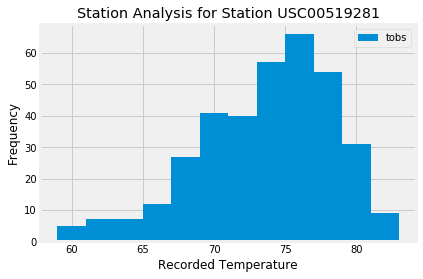

In [25]:
# plot the results as a histogram
temp_observations_df = pd.DataFrame(temp_active_station)
temp_observations_df
temp_observations_df.set_index('date')
plt.hist(temp_observations_df['tobs'],12,label='tobs')
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.title("Station Analysis for Station " + highest_active_station.station)